# Project 1 - Global AI Market and Salary Trends in 2025

Group 1: Patreek,Yannik,Vitor

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### I. Load Data

In [3]:
# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yannik_sassmann\.cache\kagglehub\datasets\bismasajjad\global-ai-job-market-and-salary-trends-2025\versions\2


In [4]:
# Load datasetc:\Users\yannik_sassmann\.cache\kagglehub\datasets\bismasajjad\global-ai-job-market-and-salary-trends-2025\versions\2

df = pd.read_csv(r"C:\Users\yannik_sassmann\.cache\kagglehub\datasets\bismasajjad\global-ai-job-market-and-salary-trends-2025\versions\2\ai_job_dataset1.csv")
df.head(5)

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


In [5]:
list(df.columns.values)

['job_id',
 'job_title',
 'salary_usd',
 'salary_currency',
 'salary_local',
 'experience_level',
 'employment_type',
 'company_location',
 'company_size',
 'employee_residence',
 'remote_ratio',
 'required_skills',
 'education_required',
 'years_experience',
 'industry',
 'posting_date',
 'application_deadline',
 'job_description_length',
 'benefits_score',
 'company_name']

## II. Define open-end questions

2.1 Which country should we move to after the bootcamp to receive the highest possible salary in AI jobs on average?

2.2 What is the impact of industry, country and experience level on salary?

## III. Data Cleaning

### 3.1 Explore Dataset

In [6]:
# Explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

In [7]:
df.shape

(15000, 20)

In [8]:
# Check datatypes
df.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
salary_local                int64
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

In [9]:
# Check for empty cells
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
salary_local              0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [10]:
# Check is NA

df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
salary_local              0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
# Check duplicates in key colum job_id
df["job_id"].duplicated().sum()

np.int64(0)

In [13]:
# Unique values
df.nunique()

job_id                    15000
job_title                    20
salary_usd                14359
salary_currency               8
salary_local              14458
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           50
remote_ratio                  3
required_skills           13651
education_required            4
years_experience             20
industry                     15
posting_date                486
application_deadline        543
job_description_length     2000
benefits_score               51
company_name                 16
dtype: int64

In [14]:
for col in df.select_dtypes(include=["object", "string"]).columns:
    print(f"{col}: {df[col].unique()}")

job_id: ['AI00001' 'AI00002' 'AI00003' ... 'AI14998' 'AI14999' 'AI15000']
job_title: ['Data Scientist' 'Head of AI' 'Data Engineer' 'Computer Vision Engineer'
 'Robotics Engineer' 'AI Consultant' 'Machine Learning Engineer'
 'Deep Learning Engineer' 'Principal Data Scientist' 'AI Product Manager'
 'Machine Learning Researcher' 'AI Software Engineer' 'ML Ops Engineer'
 'AI Architect' 'AI Specialist' 'Data Analyst' 'Research Scientist'
 'Autonomous Systems Engineer' 'NLP Engineer' 'AI Research Scientist']
salary_currency: ['USD' 'JPY' 'EUR' 'SGD' 'CAD' 'AUD' 'GBP' 'CHF']
experience_level: ['EX' 'MI' 'EN' 'SE']
employment_type: ['PT' 'CT' 'FL' 'FT']
company_location: ['Sweden' 'Japan' 'Germany' 'Finland' 'France' 'Singapore' 'Canada'
 'Australia' 'United Kingdom' 'Denmark' 'United States' 'Norway' 'India'
 'Switzerland' 'Netherlands' 'Ireland' 'Austria' 'China' 'Israel'
 'South Korea']
company_size: ['M' 'L' 'S']
employee_residence: ['Sweden' 'Japan' 'Germany' 'Finland' 'France' 'Norway' 

In [15]:
df.describe(include="all")

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,1.500000e+04,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,8,NaN,4,4,20,3,50,NaN,13651,4,NaN,15,486,543,NaN,NaN,16
top,AI00001,Machine Learning Engineer,NaN,USD,NaN,EX,CT,Switzerland,L,Switzerland,NaN,"Python, TensorFlow, Tableau",Bachelor,NaN,Government,2025-04-16,2024-10-07,NaN,NaN,Machine Intelligence Group
freq,1,824,NaN,7453,NaN,3843,3841,819,5087,669,NaN,9,3863,NaN,1035,49,49,NaN,NaN,986
mean,NaN,NaN,121991.938267,NaN,8.292366e+05,NaN,NaN,NaN,NaN,NaN,50.196667,NaN,NaN,6.365667,NaN,NaN,NaN,1500.852600,7.499540,NaN
std,NaN,NaN,63968.361846,NaN,3.425325e+06,NaN,NaN,NaN,NaN,NaN,40.844084,NaN,NaN,5.598551,NaN,NaN,NaN,574.724647,1.444202,NaN
min,NaN,NaN,16621.000000,NaN,1.662100e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,74978.500000,NaN,7.383075e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,998.750000,6.300000,NaN
50%,NaN,NaN,107261.500000,NaN,1.090355e+05,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,155752.250000,NaN,1.673278e+05,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,1994.000000,8.800000,NaN


### 3.2 Data cleaning


In [16]:
# Not a lot of data cleaning needs to happen. We dont have missing values nor duplicates. Datatypes except for date are correct.

In [17]:
# Convert date to right datatype

df["posting_date"] = pd.to_datetime(df["posting_date"])
df["application_deadline"] = pd.to_datetime(df["application_deadline"])

In [18]:
df.dtypes

job_id                            object
job_title                         object
salary_usd                         int64
salary_currency                   object
salary_local                       int64
experience_level                  object
employment_type                   object
company_location                  object
company_size                      object
employee_residence                object
remote_ratio                       int64
required_skills                   object
education_required                object
years_experience                   int64
industry                          object
posting_date              datetime64[ns]
application_deadline      datetime64[ns]
job_description_length             int64
benefits_score                   float64
company_name                      object
dtype: object

In [19]:
for col in df.select_dtypes(include=["object", "string"]).columns:
    print(f"{col}: {df[col].unique()}")

job_id: ['AI00001' 'AI00002' 'AI00003' ... 'AI14998' 'AI14999' 'AI15000']
job_title: ['Data Scientist' 'Head of AI' 'Data Engineer' 'Computer Vision Engineer'
 'Robotics Engineer' 'AI Consultant' 'Machine Learning Engineer'
 'Deep Learning Engineer' 'Principal Data Scientist' 'AI Product Manager'
 'Machine Learning Researcher' 'AI Software Engineer' 'ML Ops Engineer'
 'AI Architect' 'AI Specialist' 'Data Analyst' 'Research Scientist'
 'Autonomous Systems Engineer' 'NLP Engineer' 'AI Research Scientist']
salary_currency: ['USD' 'JPY' 'EUR' 'SGD' 'CAD' 'AUD' 'GBP' 'CHF']
experience_level: ['EX' 'MI' 'EN' 'SE']
employment_type: ['PT' 'CT' 'FL' 'FT']
company_location: ['Sweden' 'Japan' 'Germany' 'Finland' 'France' 'Singapore' 'Canada'
 'Australia' 'United Kingdom' 'Denmark' 'United States' 'Norway' 'India'
 'Switzerland' 'Netherlands' 'Ireland' 'Austria' 'China' 'Israel'
 'South Korea']
company_size: ['M' 'L' 'S']
employee_residence: ['Sweden' 'Japan' 'Germany' 'Finland' 'France' 'Norway' 

### 3.3 Drop unnecssary columns

In [20]:
# Drop unnecessary columns
df = df.drop(["salary_currency", "salary_local", "posting_date", "application_deadline", "job_description_length"], axis = 1)

In [21]:
list(df.columns.values)

['job_id',
 'job_title',
 'salary_usd',
 'experience_level',
 'employment_type',
 'company_location',
 'company_size',
 'employee_residence',
 'remote_ratio',
 'required_skills',
 'education_required',
 'years_experience',
 'industry',
 'benefits_score',
 'company_name']

In [22]:
df.shape

(15000, 15)

### 3.4. Save Dataset

In [23]:
# Save cleaned dataset as new CSV file:

df.to_csv("lab_ai_jobs.csv", index=False)

## IV. EDA

### 4.1. Idenfity variable types

In [24]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [25]:
num.columns

Index(['salary_usd', 'remote_ratio', 'years_experience', 'benefits_score'], dtype='object')

In [26]:
cat.columns

Index(['job_id', 'job_title', 'experience_level', 'employment_type',
       'company_location', 'company_size', 'employee_residence',
       'required_skills', 'education_required', 'industry', 'company_name'],
      dtype='object')

In [27]:
print(list(num.columns.values))
print(num.dtypes)
print(num.shape)


['salary_usd', 'remote_ratio', 'years_experience', 'benefits_score']
salary_usd            int64
remote_ratio          int64
years_experience      int64
benefits_score      float64
dtype: object
(15000, 4)


In [28]:
print(list(cat.columns.values))
print(cat.dtypes)
print(cat.shape)


['job_id', 'job_title', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'required_skills', 'education_required', 'industry', 'company_name']
job_id                object
job_title             object
experience_level      object
employment_type       object
company_location      object
company_size          object
employee_residence    object
required_skills       object
education_required    object
industry              object
company_name          object
dtype: object
(15000, 11)


In [29]:
# Alternative solution

num1 = df.select_dtypes("int64", "float64").columns
print(num1)

Index(['salary_usd', 'remote_ratio', 'years_experience'], dtype='object')


In [30]:
cat1 = df.select_dtypes("object", "string").columns
print(cat1)

Index(['job_id', 'job_title', 'experience_level', 'employment_type',
       'company_location', 'company_size', 'employee_residence',
       'required_skills', 'education_required', 'industry', 'company_name'],
      dtype='object')


### 4.2 Univariate EDA

In [31]:
num.describe()

,salary_usd,remote_ratio,years_experience,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,121991.938267,50.196667,6.365667,7.499540
std,63968.361846,40.844084,5.598551,1.444202
min,16621.000000,0.000000,0.000000,5.000000
25%,74978.500000,0.000000,2.000000,6.300000
50%,107261.500000,50.000000,5.000000,7.500000
75%,155752.250000,100.000000,10.000000,8.800000
max,410273.000000,100.000000,19.000000,10.000000


In [32]:
cat.describe()

,job_id,job_title,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,industry,company_name
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,15000,20,4,4,20,3,50,13651,4,15,16
top,AI00001,Machine Learning Engineer,EX,CT,Switzerland,L,Switzerland,"Python, TensorFlow, Tableau",Bachelor,Government,Machine Intelligence Group
freq,1,824,3843,3841,819,5087,669,9,3863,1035,986


#### 4.2.1. Numerical Values: Histograms

<function matplotlib.pyplot.show(close=None, block=None)>

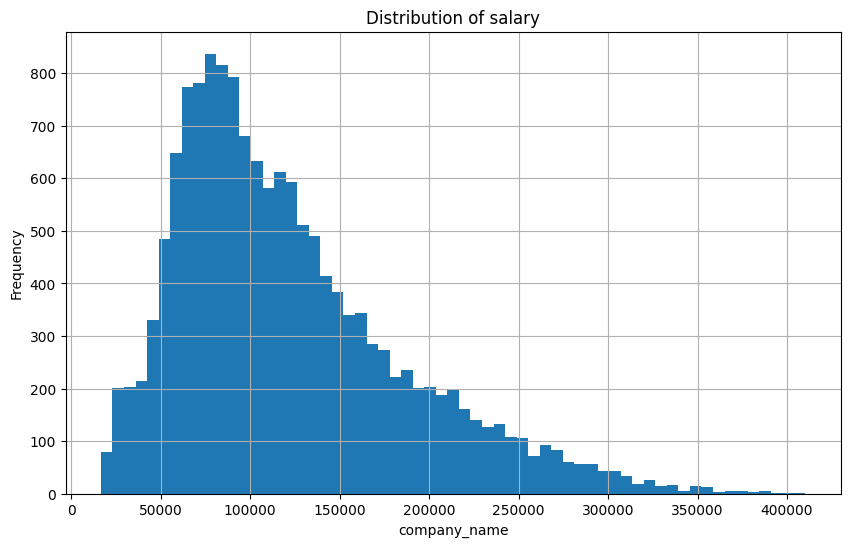

In [33]:
plt.figure(figsize=(10, 6))
df["salary_usd"].hist(bins = "auto")
plt.title("Distribution of salary")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

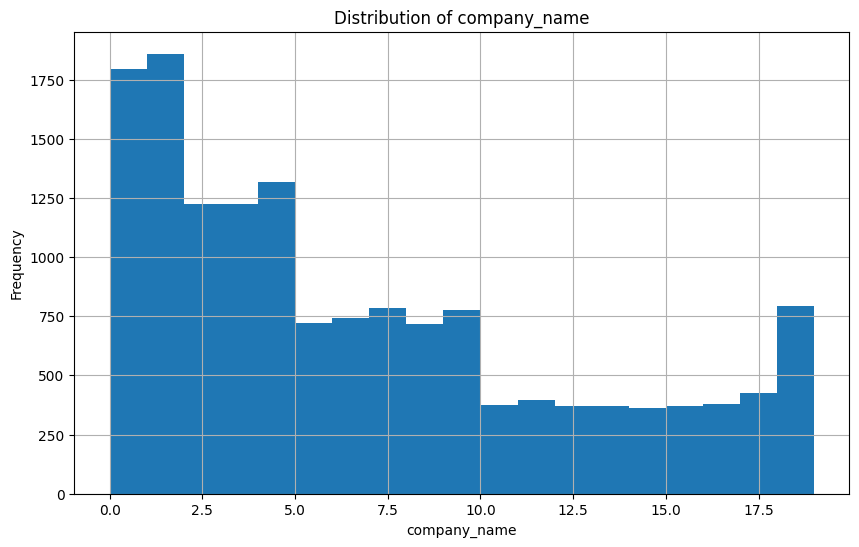

In [34]:
plt.figure(figsize=(10, 6))
df["years_experience"].hist(bins = "auto")
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

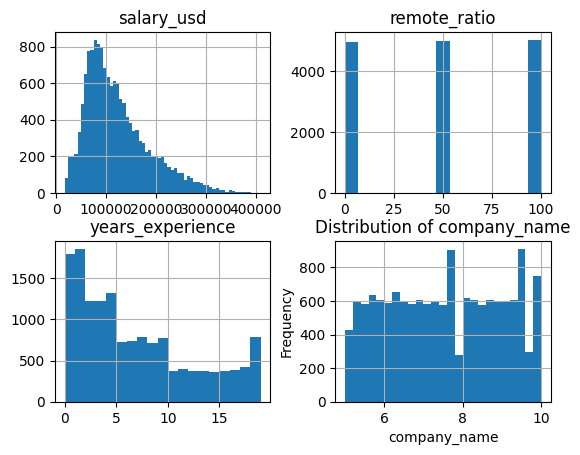

In [35]:
plt.figure(figsize=(10, 6))
df.hist(bins = "auto")
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show

#### 4.2.2. Numerical Values: Boxplots


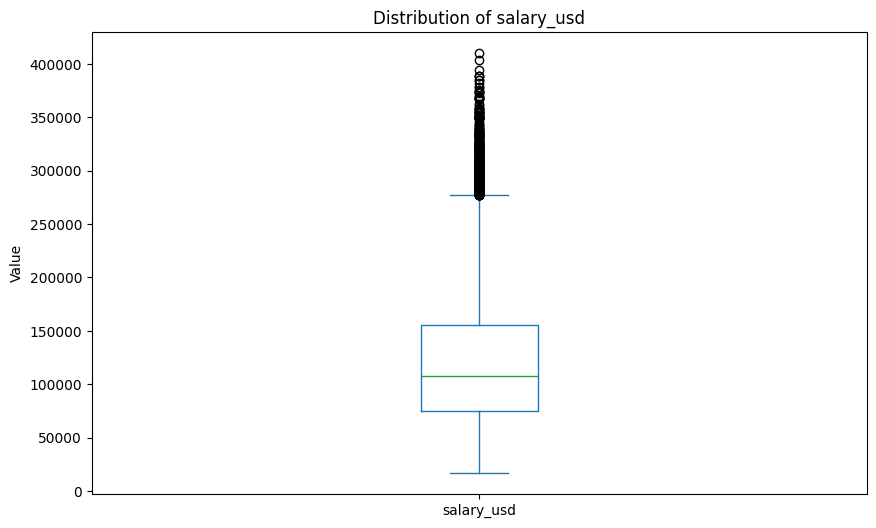

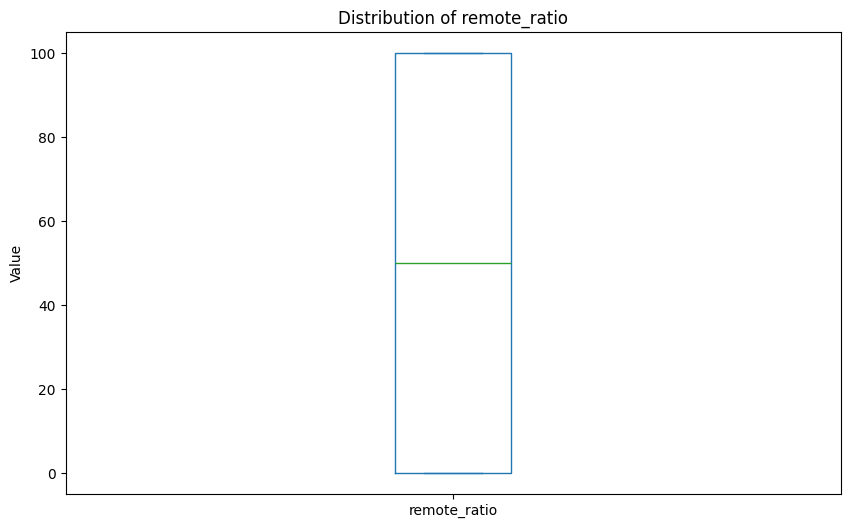

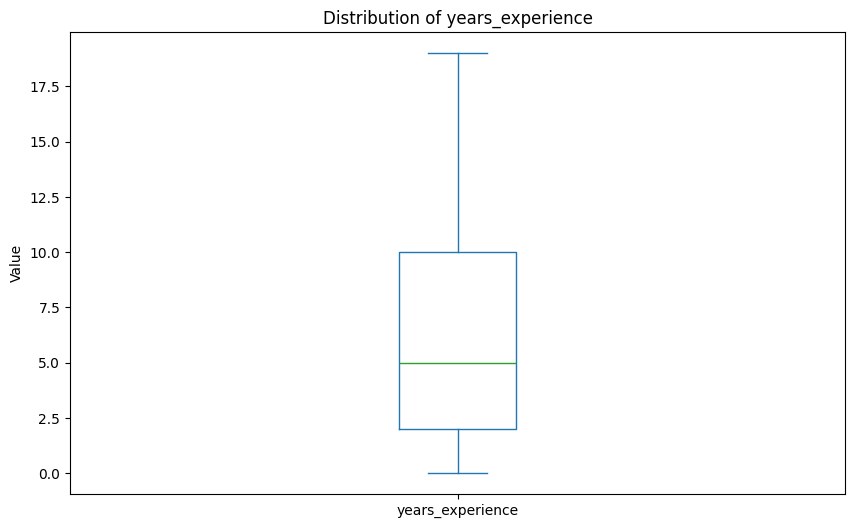

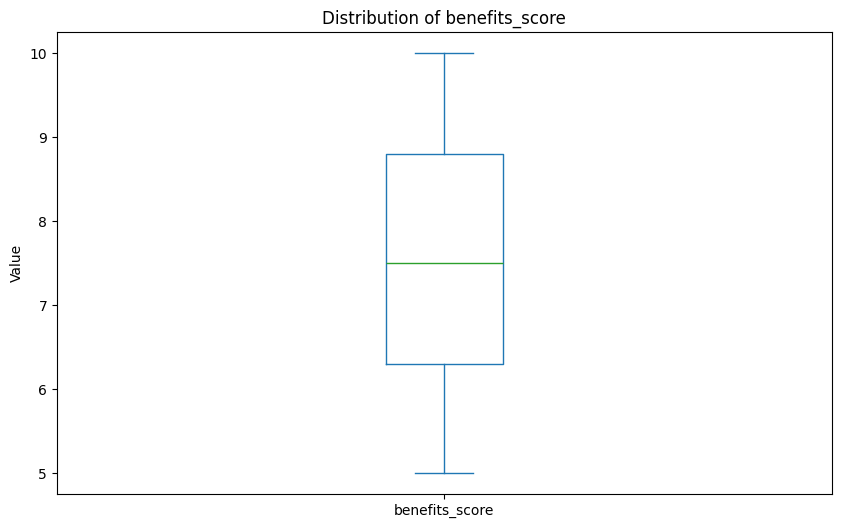

In [36]:
for col in num:
    plt.figure(figsize=(10, 6))   
    num[col].plot.box()              
    plt.title(f"Distribution of {col}")  
    plt.ylabel("Value")                 
    plt.show()                  

#### 4.2.3. Categorical Values: Count

In [37]:
for col in cat:
    print(f"Frequency of the counts for {col}")
    print(df[col].value_counts())


Frequency of the counts for job_id
job_id
AI00001    1
AI00002    1
AI00003    1
AI00004    1
AI00005    1
          ..
AI14996    1
AI14997    1
AI14998    1
AI14999    1
AI15000    1
Name: count, Length: 15000, dtype: int64
Frequency of the counts for job_title
job_title
Machine Learning Engineer      824
Deep Learning Engineer         786
Computer Vision Engineer       780
AI Specialist                  774
Data Engineer                  769
Principal Data Scientist       768
AI Product Manager             764
Data Scientist                 763
Robotics Engineer              762
AI Architect                   758
Autonomous Systems Engineer    755
NLP Engineer                   741
Machine Learning Researcher    734
Data Analyst                   734
Research Scientist             731
AI Software Engineer           730
AI Research Scientist          724
AI Consultant                  713
Head of AI                     701
ML Ops Engineer                689
Name: count, dtype: int64


#### 4.2.4. Categorical Variables:

In [38]:
for col in cat:
    print(cat[col].value_counts())

job_id
AI00001    1
AI00002    1
AI00003    1
AI00004    1
AI00005    1
          ..
AI14996    1
AI14997    1
AI14998    1
AI14999    1
AI15000    1
Name: count, Length: 15000, dtype: int64
job_title
Machine Learning Engineer      824
Deep Learning Engineer         786
Computer Vision Engineer       780
AI Specialist                  774
Data Engineer                  769
Principal Data Scientist       768
AI Product Manager             764
Data Scientist                 763
Robotics Engineer              762
AI Architect                   758
Autonomous Systems Engineer    755
NLP Engineer                   741
Machine Learning Researcher    734
Data Analyst                   734
Research Scientist             731
AI Software Engineer           730
AI Research Scientist          724
AI Consultant                  713
Head of AI                     701
ML Ops Engineer                689
Name: count, dtype: int64
experience_level
EX    3843
MI    3764
SE    3741
EN    3652
Name: count,

In [39]:
# As our two research questions need the categorical variables countries, industry and level of experience. We focus on those three categorical variables in this analysis step.

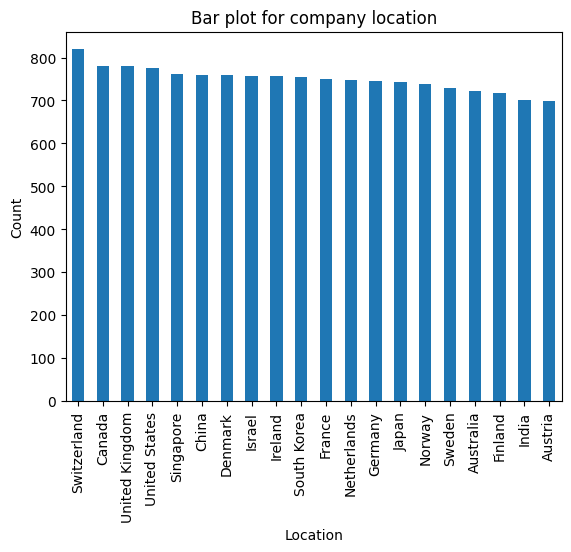

In [40]:
df["company_location"].value_counts().plot(kind="bar")
plt.title("Bar plot for company location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

In [74]:
df["company_location"].value_counts().head(5)

company_location
Switzerland       819
Canada            781
United Kingdom    780
United States     776
Singapore         762
Name: count, dtype: int64

In [75]:
df["company_location"].value_counts().tail(5)

company_location
Sweden       729
Australia    721
Finland      718
India        702
Austria      699
Name: count, dtype: int64

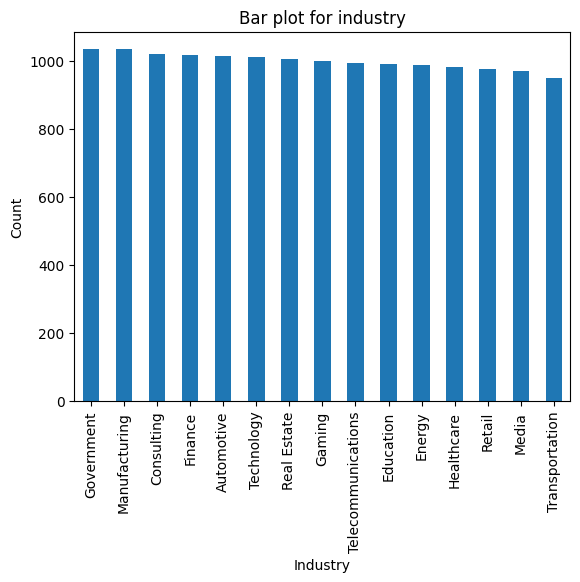

In [41]:
df["industry"].value_counts().plot(kind="bar")
plt.title("Bar plot for industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

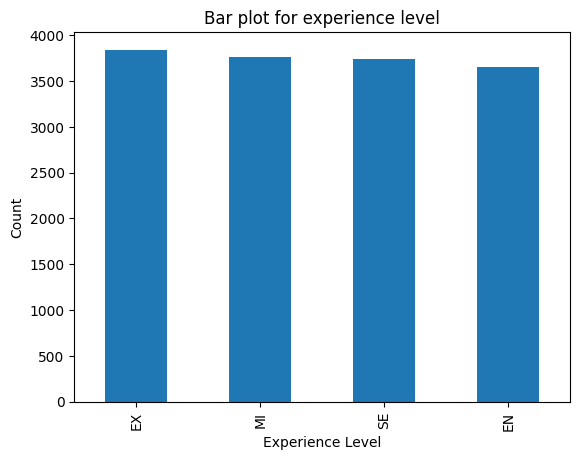

In [42]:
df["experience_level"].value_counts().plot(kind="bar")
plt.title("Bar plot for experience level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

# 1. ES = Executive
# 2. SE = Senior Level
# 3. MI = Middle Management
# 4. EN = Entry-level

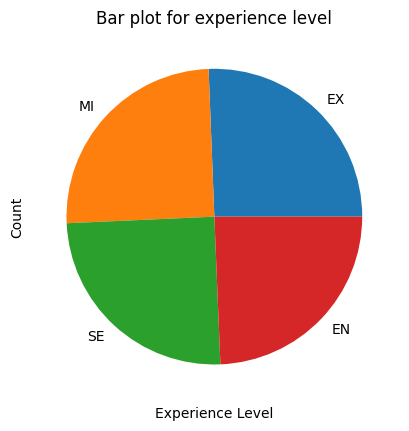

In [43]:
# Pie chart (for fun):

df["experience_level"].value_counts().plot(kind="pie")
plt.title("Bar plot for experience level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()

In [68]:
df["experience_level"].describe()

count     15000
unique        4
top          EX
freq       3843
Name: experience_level, dtype: object

In [72]:
round(df["experience_level"].value_counts(normalize = True) * 100, 2)

experience_level
EX    25.62
MI    25.09
SE    24.94
EN    24.35
Name: proportion, dtype: float64

In [76]:
round(df["education_required"].value_counts(normalize = True) * 100, 2)

education_required
Bachelor     25.75
PhD          25.07
Associate    24.59
Master       24.59
Name: proportion, dtype: float64

### 4.3 Bivariate EDA

Answering: 2.1 Which country should we move to after the bootcamp to receive the highest possible salary in AI jobs on average?

In [44]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'experience_level',
       'employment_type', 'company_location', 'company_size',
       'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'benefits_score',
       'company_name'],
      dtype='object')

In [73]:
entry_level = df[df["experience_level"] == "EN"]

avg_salary = round(entry_level.groupby("company_location")["salary_usd"].mean().sort_values(ascending = False), 2)
print(avg_salary)


company_location
Switzerland       96106.56
Denmark           88037.32
Norway            86331.52
United States     79291.15
Japan             72044.36
Netherlands       71662.50
Singapore         70928.82
United Kingdom    70454.39
Germany           67802.77
Ireland           67280.01
Australia         66795.79
Sweden            66447.79
Austria           63885.70
Canada            62637.86
Finland           62505.30
Israel            62462.82
France            62087.34
South Korea       54433.29
China             31138.74
India             23891.13
Name: salary_usd, dtype: float64


In [83]:
df.groupby("company_location")["salary_usd"].mean().sort_values(ascending=False)

company_location
Switzerland       172995.235653
Norway            161036.844384
Denmark           158599.661397
United States     141987.246134
Japan             131289.029650
Netherlands       130924.208556
United Kingdom    130063.897436
Singapore         129558.322835
Australia         125719.941748
Ireland           124034.301189
Sweden            123540.768176
Germany           122940.386059
Austria           118289.035765
Israel            116613.860158
Finland           116267.022284
France            114694.489987
Canada            113693.782330
South Korea        97575.503311
China              57285.023684
India              43208.626781
Name: salary_usd, dtype: float64

In [85]:
df["salary_usd"].mean()

np.float64(121991.93826666666)

In [90]:
df.groupby("experience_level")["salary_usd"].mean().sort_values(ascending=False)

experience_level
EX    198485.211033
SE    127910.973536
MI     91585.485654
EN     66773.737130
Name: salary_usd, dtype: float64

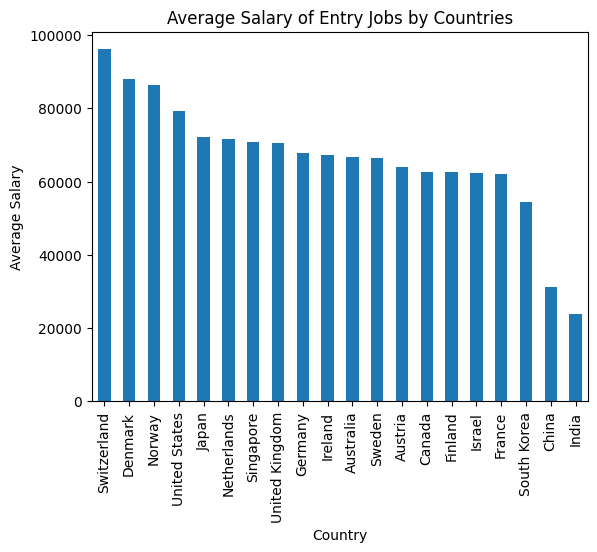

In [86]:
avg_salary.plot(kind="bar")
plt.title("Average Salary of Entry Jobs by Countries")
plt.xlabel("Country")
plt.ylabel("Average Salary")
plt.show()

In [47]:
# The answer to our research question no. 1 is, that the country with highest mean salary for entry-level positions is Switzerland. So we should all move to Switzerland after out Bootcamp.

In [48]:
max_salary = entry_level.groupby("company_location")["salary_usd"].max().sort_values(ascending = False)
print(max_salary)

company_location
Switzerland       130984
Norway            120164
Denmark           119989
United States     108749
Japan              98266
Netherlands        98140
Singapore          97522
United Kingdom     97239
Germany            92735
Australia          92492
Ireland            92335
Sweden             92326
Canada             87180
Israel             87092
Austria            87012
France             86855
Finland            85906
South Korea        76299
China              43464
India              32773
Name: salary_usd, dtype: int64


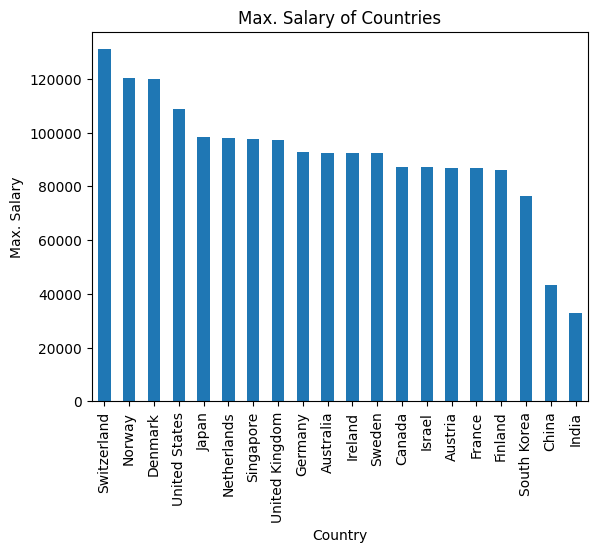

In [49]:
max_salary.plot(kind="bar")
plt.title("Max. Salary of Countries")
plt.xlabel("Country")
plt.ylabel("Max. Salary")
plt.show()

In [50]:
pd.crosstab(df["experience_level"], df["company_location"])

company_location,Australia,Austria,Canada,China,Denmark,Finland,France,Germany,India,Ireland,Israel,Japan,Netherlands,Norway,Singapore,South Korea,Sweden,Switzerland,United Kingdom,United States
experience_level,,,,,,,,,,,,,,,,,,,,
EN,170,157,197,172,191,168,194,176,171,183,184,182,176,157,190,192,168,212,206,206
EX,190,200,190,183,202,193,190,195,174,200,208,196,192,198,186,157,186,209,202,192
MI,165,177,196,209,191,170,187,178,189,202,181,175,198,202,179,199,177,201,191,197
SE,196,165,198,196,175,187,178,197,168,172,185,189,182,182,207,207,198,197,181,181


In [51]:
rel_freq = pd.crosstab(df["experience_level"], df["company_location"], normalize = "columns")
rel_freq.round(3)

company_location,Australia,Austria,Canada,China,Denmark,Finland,France,Germany,India,Ireland,Israel,Japan,Netherlands,Norway,Singapore,South Korea,Sweden,Switzerland,United Kingdom,United States
experience_level,,,,,,,,,,,,,,,,,,,,
EN,0.236,0.225,0.252,0.226,0.252,0.234,0.259,0.236,0.244,0.242,0.243,0.245,0.235,0.212,0.249,0.254,0.230,0.259,0.264,0.265
EX,0.264,0.286,0.243,0.241,0.266,0.269,0.254,0.261,0.248,0.264,0.274,0.264,0.257,0.268,0.244,0.208,0.255,0.255,0.259,0.247
MI,0.229,0.253,0.251,0.275,0.252,0.237,0.250,0.239,0.269,0.267,0.239,0.236,0.265,0.273,0.235,0.264,0.243,0.245,0.245,0.254
SE,0.272,0.236,0.254,0.258,0.231,0.260,0.238,0.264,0.239,0.227,0.244,0.255,0.243,0.246,0.272,0.274,0.272,0.241,0.232,0.233


In [52]:
entry_level_freq = rel_freq.loc["EN"]
sorted_entry_level = entry_level_freq.sort_values(ascending=False)
print(sorted_entry_level)


company_location
United States     0.265464
United Kingdom    0.264103
France            0.259012
Switzerland       0.258852
South Korea       0.254305
Canada            0.252241
Denmark           0.251647
Singapore         0.249344
Japan             0.245283
India             0.243590
Israel            0.242744
Ireland           0.241744
Germany           0.235925
Australia         0.235784
Netherlands       0.235294
Finland           0.233983
Sweden            0.230453
China             0.226316
Austria           0.224607
Norway            0.212449
Name: EN, dtype: float64


In [53]:
# However the US, UK and France rank higher in opportunities for entry-level positions. So we want to increase our chances of getting a job at all, we might want to consider
# moving to those countries.

In [54]:
edu_industry_percentile = pd.crosstab(df["industry"], df["education_required"], normalize="index")*100
edu_industry_percentile

education_required,Associate,Bachelor,Master,PhD
industry,,,,
Automotive,24.137931,26.009852,24.926108,24.926108
Consulting,24.191969,28.207640,23.898139,23.702253
Education,24.899194,25.504032,23.185484,26.411290
Energy,21.536906,25.581395,24.165824,28.715875
Finance,25.245580,27.603143,24.459725,22.691552
Gaming,25.925926,26.426426,24.124124,23.523524
Government,24.057971,26.859903,24.347826,24.734300
Healthcare,22.560976,26.219512,26.117886,25.101626
Manufacturing,25.410628,23.671498,24.830918,26.086957


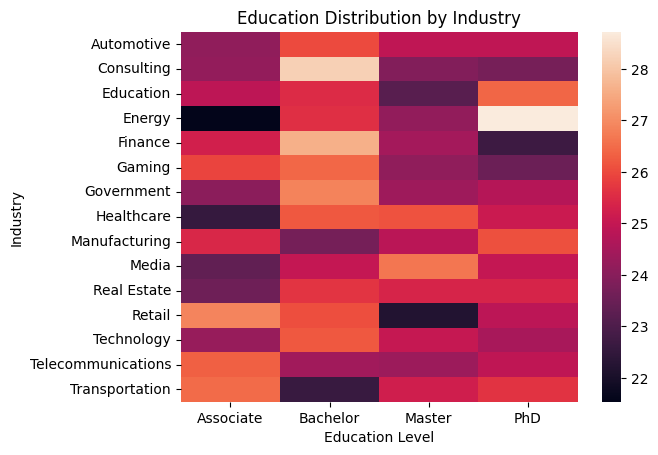

In [55]:
sns.heatmap(data=edu_industry_percentile)
plt.title ("Education Distribution by Industry")
plt.xlabel('Education Level')
plt.ylabel('Industry')
plt.show()

#### 4.3.1 Scatterplot

Answering: 2.2 What is the impact of industry, country and experience level on salary?

In [56]:
df.groupby(["industry", "company_location", "experience_level"])["salary_usd"].mean().sort_values(ascending=False).head(15)

industry            company_location  experience_level
Finance             Switzerland       EX                  326320.222222
Gaming              Switzerland       EX                  302313.384615
Retail              Switzerland       EX                  288326.157895
Transportation      Denmark           EX                  288077.333333
Automotive          Switzerland       EX                  288010.923077
Consulting          Switzerland       EX                  284407.058824
Media               Switzerland       EX                  284226.000000
                    Denmark           EX                  283627.312500
Education           Switzerland       EX                  278926.833333
Technology          Switzerland       EX                  277328.363636
Telecommunications  Norway            EX                  275888.700000
Manufacturing       Switzerland       EX                  275858.750000
Transportation      Switzerland       EX                  272755.500000
Technolog

In [57]:
corr_matrix = df[['salary_usd', 'remote_ratio', 'years_experience', 'benefits_score']].corr()
corr_matrix

,salary_usd,remote_ratio,years_experience,benefits_score
salary_usd,1.000000,0.003495,0.744043,-0.001873
remote_ratio,0.003495,1.000000,0.003607,-0.000117
years_experience,0.744043,0.003607,1.000000,0.002875
benefits_score,-0.001873,-0.000117,0.002875,1.000000


C:\Users\yannik_sassmann\AppData\Local\Temp\ipykernel_18548\1239866413.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="years_experience", y="salary_usd", palette = "viridis")


<Axes: xlabel='years_experience', ylabel='salary_usd'>

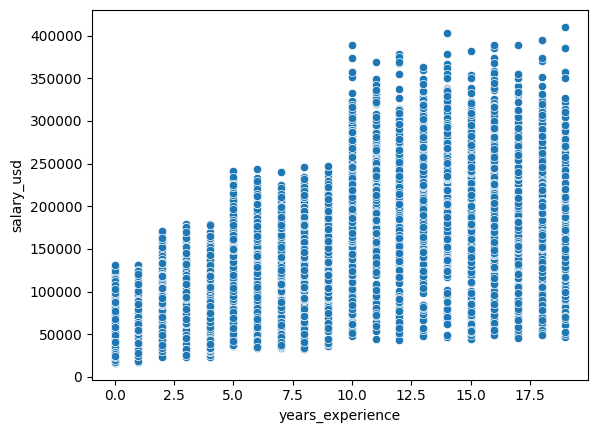

In [58]:
sns.scatterplot(data=df, x="years_experience", y="salary_usd", palette = "viridis")

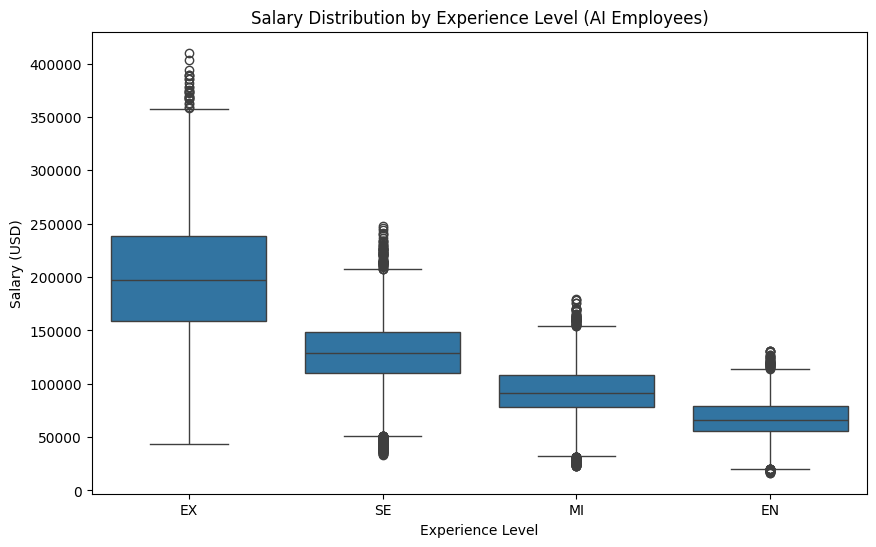

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="experience_level", y="salary_usd", order=["EX", "SE", "MI", "EN"])
plt.title("Salary Distribution by Experience Level (AI Employees)")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

C:\Users\yannik_sassmann\AppData\Local\Temp\ipykernel_18548\877641799.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="industry", y="salary_usd", palette = "viridis")


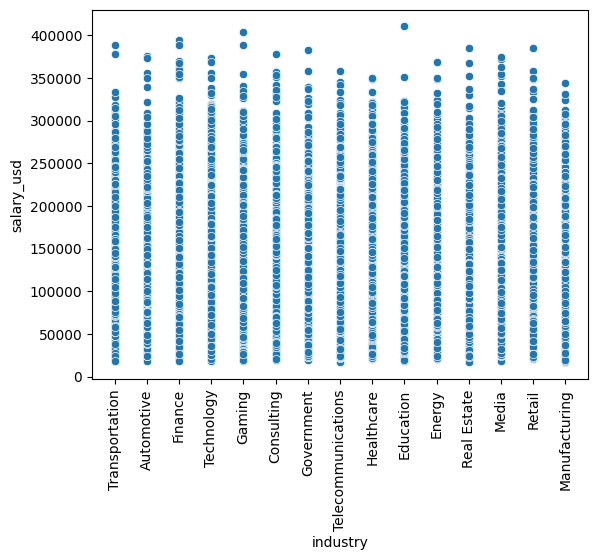

In [60]:
sns.scatterplot(data=df, x="industry", y="salary_usd", palette = "viridis")
plt.xticks(rotation=90)
plt.show()

In [ ]:
order = df.groupby("industry")["salary_usd"].mean().sort_values().index

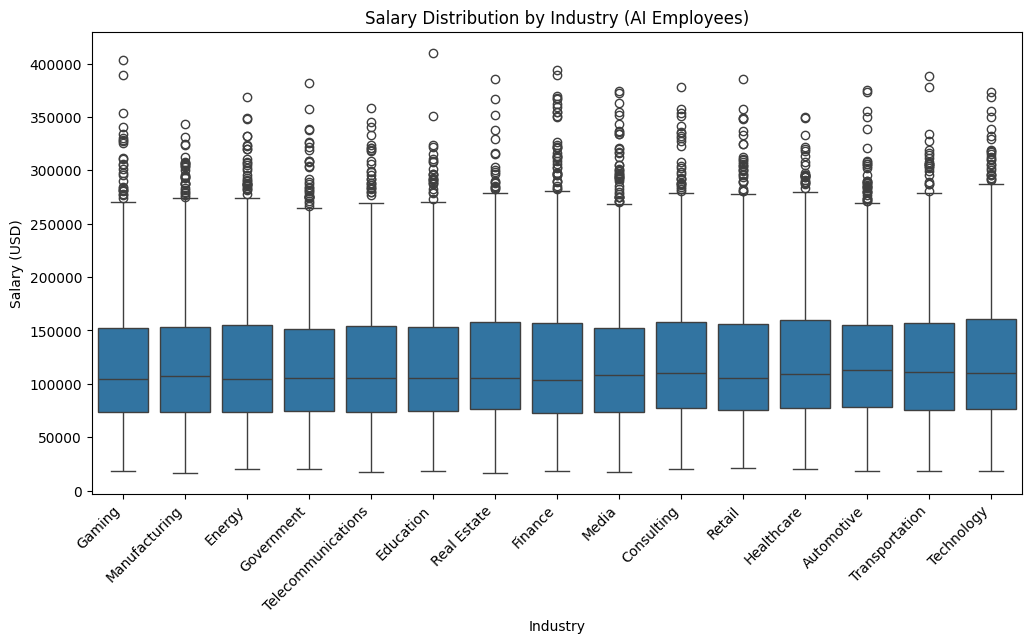

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="industry", y="salary_usd",  order=order)
plt.title("Salary Distribution by Industry (AI Employees)")
plt.xlabel("Industry")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [91]:
df.groupby("industry")["salary_usd"].mean().sort_values(ascending=False)

industry
Technology            125733.192878
Transportation        124138.421661
Automotive            123930.440394
Healthcare            123916.978659
Retail                122527.614519
Consulting            122383.428991
Media                 121880.372428
Finance               121582.105108
Real Estate           121122.930348
Education             121041.345766
Telecommunications    120806.606030
Government            120637.339130
Energy                120359.182002
Manufacturing         120082.944928
Gaming                119894.716717
Name: salary_usd, dtype: float64

C:\Users\yannik_sassmann\AppData\Local\Temp\ipykernel_18548\1579552575.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="company_location", y="salary_usd", palette = "viridis")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Sweden'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Finland'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Denmark'),
  Text(10, 0, 'United States'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'India'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Netherlands'),
  Text(15, 0, 'Ireland'),
  Text(16, 0, 'Austria'),
  Text(17, 0, 'China'),
  Text(18, 0, 'Israel'),
  Text(19, 0, 'South Korea')])

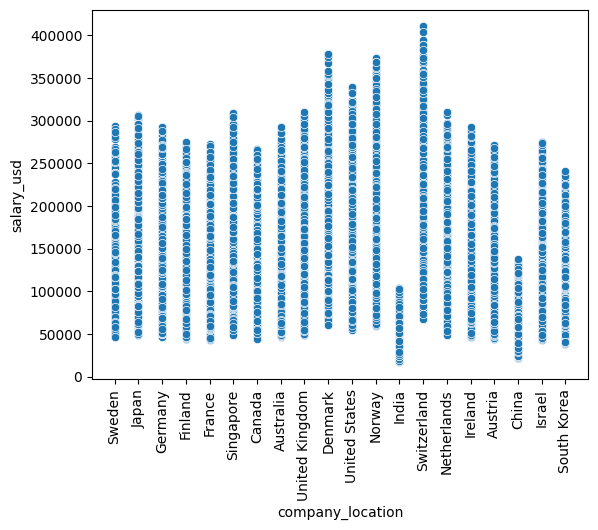

In [63]:
sns.scatterplot(data=df, x="company_location", y="salary_usd", palette = "viridis")
plt.xticks(rotation=90)

In [64]:
order_country = df.groupby("company_location")["salary_usd"].mean().sort_values(ascending= False).index

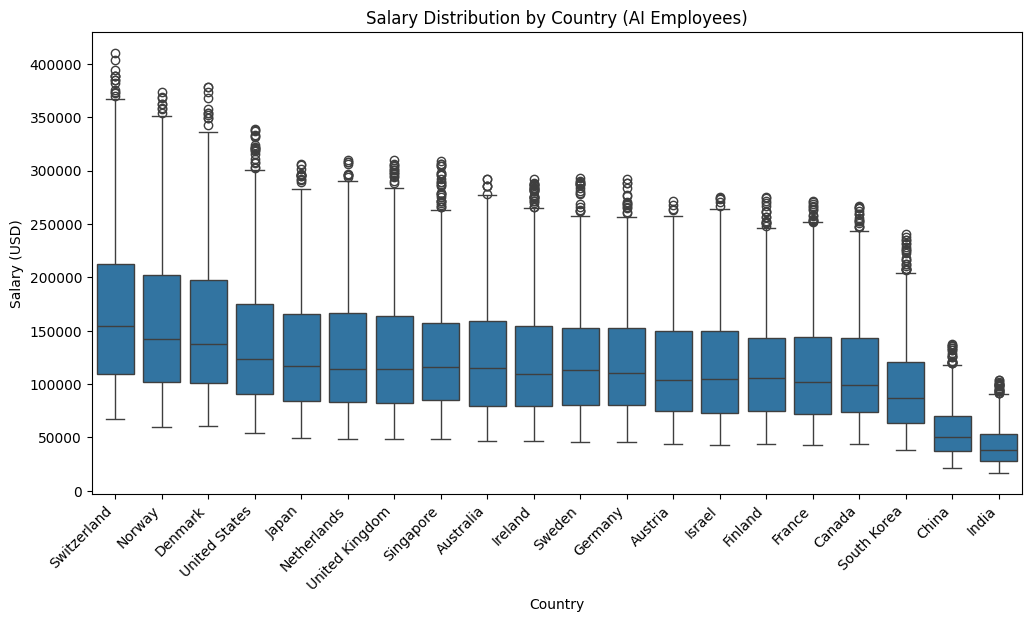

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="company_location", y="salary_usd", order = order_country)
plt.title("Salary Distribution by Country (AI Employees)")
plt.xlabel("Country")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

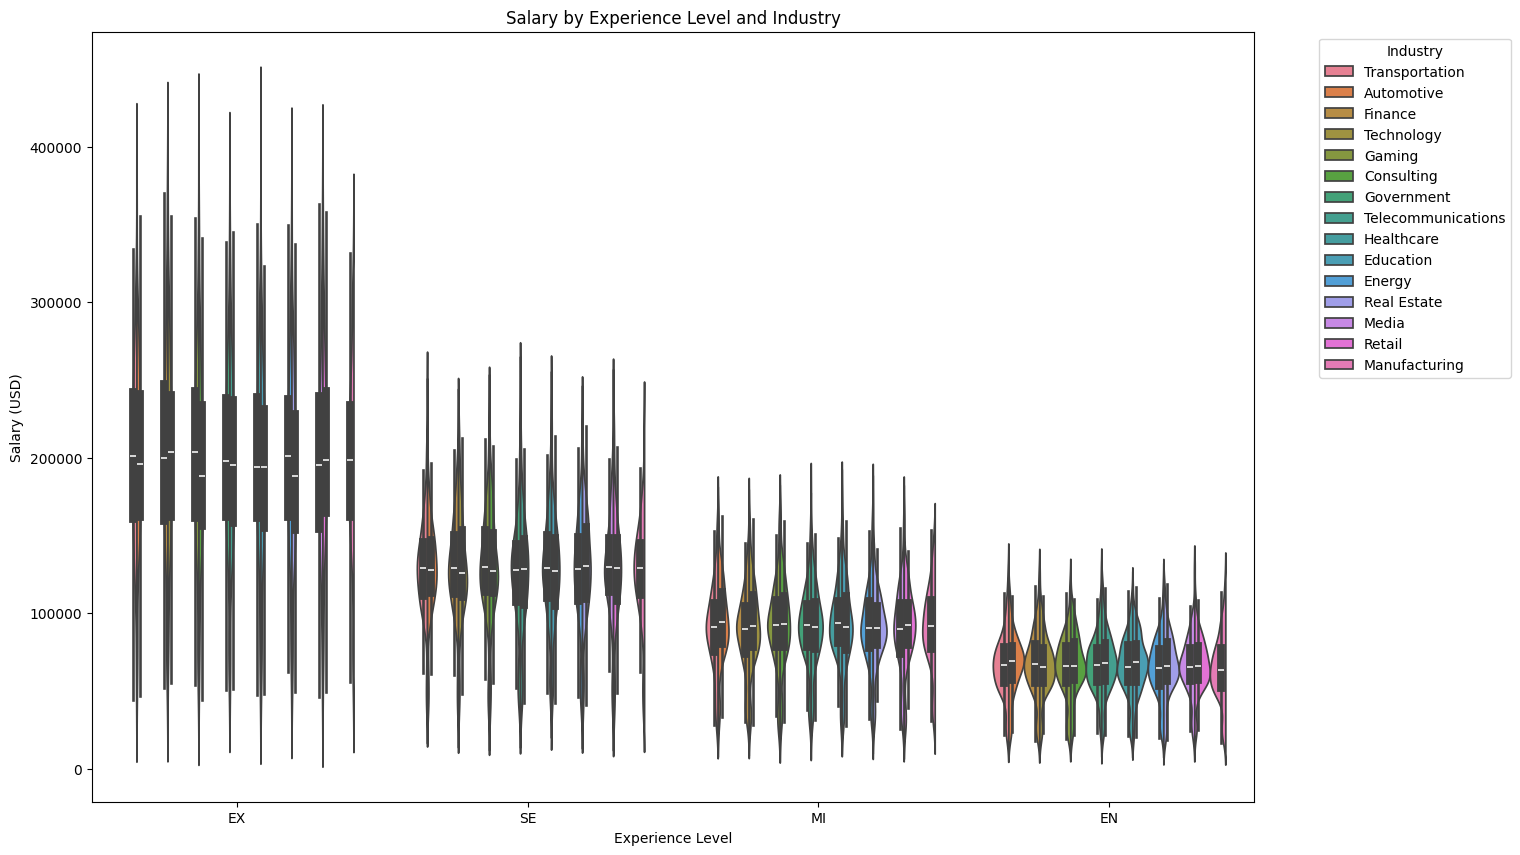

In [92]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x="experience_level", y="salary_usd", hue="industry", split=True, order=["EX", "SE", "MI", "EN"])
plt.title("Salary by Experience Level and Industry")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [67]:
pivot = pd.pivot_table(df,
                       values="salary_usd",
                       index=["industry"],
                       columns=["experience_level"],
                       aggfunc="mean")
print(pivot.round(0))

experience_level         EN        EX       MI        SE
industry                                                
Automotive          67378.0  199797.0  94807.0  127313.0
Consulting          67359.0  194525.0  93696.0  129118.0
Education           67941.0  192478.0  92511.0  126552.0
Energy              64794.0  201225.0  91489.0  125982.0
Finance             67282.0  203019.0  87885.0  129939.0
Gaming              65808.0  200849.0  91488.0  131108.0
Government          67873.0  197293.0  91077.0  123772.0
Healthcare          66197.0  197044.0  93947.0  128980.0
Manufacturing       64498.0  197315.0  91702.0  126230.0
Media               65979.0  199345.0  88214.0  129013.0
Real Estate         67010.0  189706.0  90166.0  129345.0
Retail              67680.0  202702.0  92255.0  127704.0
Technology          66501.0  204378.0  93359.0  129814.0
Telecommunications  68276.0  197451.0  91123.0  125141.0
Transportation      67190.0  201038.0  90139.0  129199.0


# Salary Distribution

Average salary (USD): ≈ $122K, with a wide spread (std ≈ $64K).

The range is large — from $16K up to $410K, indicating strong inequality in A.I. pay.

Salaries increase sharply with experience level, which we will detail below.

A.I. salaries change significantly, reflecting both experience level and regional economic differences.

# Impact of Experience

Salary growth with experience is very strong — consistent across all industries.
Executives (EX) earn ~3x more than entry-level (EN) employees.

Technology and Finance lead A.I. salaries globally.

# Impact of industry

Education, Consulting, and Real Estate are on the lower end — possibly due to less profit margin or smaller-scale A.I. adoption.

Across all industries, Executive experience consistently yields salaries around $190K–$205K.

# Impact of countries

Western European countries with high cost of living (especially Switzerland) lead in compensation, likely due to both currency strength and advanced AI infrastructure.

# Education and industry

Bachelor’s remains the most common degree overall.

PhDs are concentrated in research-heavy industries (Energy, Manufacturing).

Education level distribution is stable — differences come mainly from experience and geography, not degree type alone.

# Conclusion

Experience and location are the strongest determinants of A.I. salaries.

Industry matters: Tech and Finance consistently lead, while public or creative sectors lag.

Education alone doesn’t drive salary — it supports progression but doesn’t replace experience.

Benefits and salaries rise together, suggesting better employers offer comprehensive compensation packages.

The A.I. job market is globally lucrative, with clear rewards for specialization and seniority.

